In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model
import networkx as nx
from flow_computation import flow_computation

In [2]:
## Load necessary data
G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))
paths = pickle.load(open('data/final_paths.p', "rb"))

In [70]:
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

harbour_nodes = df_h.harbour_node.unique()

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

## Plot network flow within data set

We want to use the flow value for each path to compute the flow value for each link using paths now

In [4]:
flows = flow_computation(df_ivs, 100000, path_lengths)

In [5]:
sum(flows.values())/(24*100*1000)

1.2257671626984261

In [71]:
df_links = nx.to_pandas_edgelist(G)

In [72]:
def plot_context(G, flows, attribute_name, scale_factor):

    df_links[attribute_name] = 0
    for key, flow in flows.items():
        route = paths[key]
        # print(route)
        passed_links = [route[i:(i + 2)] for i in range(len(route) - 1)]
        # print(passed_links)
        for link in passed_links:
            df_links.loc[(df_links.source.isin(link)) & (df_links.target.isin(link)), attribute_name] += flow

    flow_values_edges = dict(zip(tuple(zip(df_links.source, df_links.target)), df_links[attribute_name]))
    nx.set_edge_attributes(G, flow_values_edges, attribute_name)

    fig, ax = plt.subplots(dpi=200)


    widths = nx.get_edge_attributes(G, attribute_name)
    scale_factor = scale_factor
    scaled_widths = {i:(widths[i]/scale_factor) for i in widths.keys()}



    nx.draw_networkx_edges(G,pos_dict,
                           edgelist = scaled_widths.keys(),
                           width=list(scaled_widths.values()),
                           # edge_color='blue',
                           alpha=1)

    nx.draw_networkx_nodes(G,pos_dict,
                       nodelist=harbour_nodes,
                       node_size=30,
                       node_color='r',
                       alpha=1)

    # nx.draw_networkx_labels(G, pos=pos_dict,
    #                         labels=dict(zip(nodelist,nodelist)),
    #                         font_color='white')
    plt.box(False)
    img = plt.imread("data/NL_map.png")
    x1, x2, y1, y2 = 3.566619, 6.944693, 50.860830, 53.444274
    z = 0.53
    ax.imshow(img, extent=[x1-z, x2+z, y1-z+0.3, y2+z-0.3])
    plt.show()
    return widths

In [73]:
df_links

,source,target,GeoType,geometry,WidePushedDepth,length_deg,SeaFairingDepth,SeaFairingLength,Description,captured_flow_150000,...,SeaFairingWidth,PushedWidth,SeaFairingHeight,split,length_m,GeneralWidth,Id_navigability,CoupledDepth,Classification,CoupledWidth
0,8864153,8860579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123268.182319,...,NaN,NaN,NaN,0,16360.268924,NaN,NaN,NaN,NaN,NaN
1,8864153,8868168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17412.719942,...,NaN,NaN,NaN,0,7515.446384,NaN,NaN,NaN,NaN,NaN
2,8868065,8863614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4277.328217,...,NaN,NaN,NaN,0,1826.967461,NaN,NaN,NaN,NaN,NaN
3,8868065,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,20319.738243,NaN,NaN,NaN,NaN,NaN
4,8868065,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,18512.337071,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,8863335,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,19632.952112,NaN,NaN,NaN,NaN,NaN
308,8860623,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,15546.399338,NaN,NaN,NaN,NaN,NaN
309,118,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,25298.547813,NaN,NaN,NaN,NaN,NaN
310,127,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,22932.767547,NaN,NaN,NaN,NaN,NaN


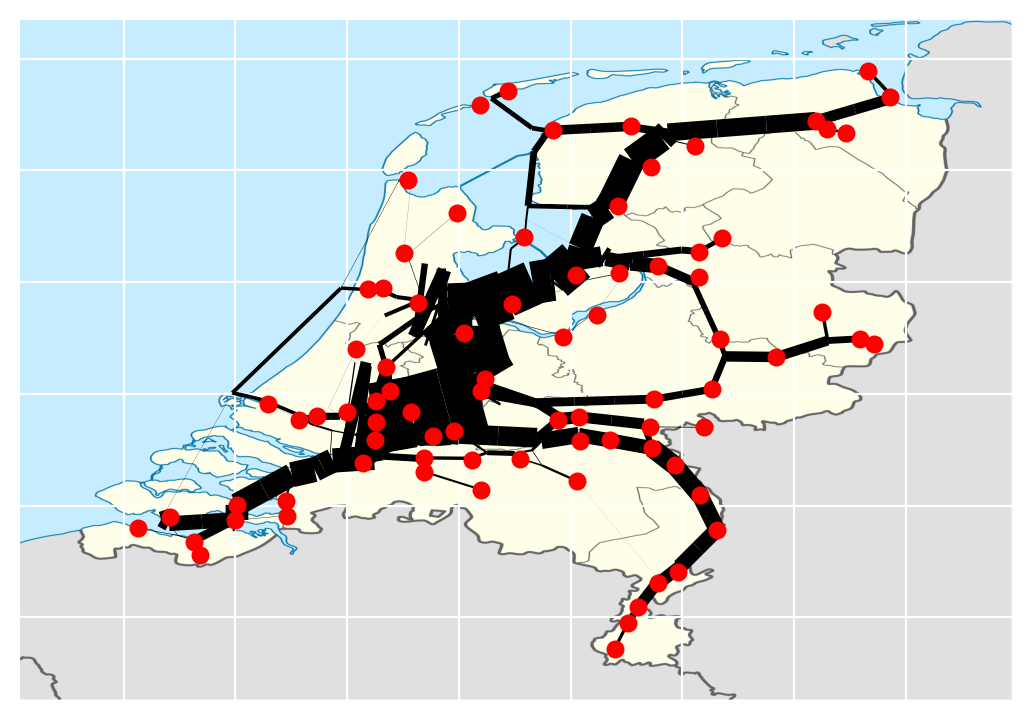

In [74]:
widths0 = plot_context(G, flows, 'passing_flow', 50000)

In [10]:
flows

{('NLABL', 'NLRTM', 0): 2703.5759068704283,
 ('NLAER', 'NLLEY', 0): 2212.1197716431006,
 ('NLAER', 'NLNIE', 0): 11277.026528683966,
 ('NLAER', 'NLRTM', 0): 29584.42839171218,
 ('NLAER', 'NLSWI', 0): 2026.462219711935,
 ('NLALK', 'NLIJM', 0): 2958.486641160946,
 ('NLALM', 'NLAMS', 0): 13845.614839244201,
 ('NLALM', 'NLHGL', 0): 1421.2166782652048,
 ('NLAMS', 'NLAER', 0): 15624.956869527034,
 ('NLAMS', 'NLBON', 0): 56.88004312364645,
 ('NLAMS', 'NLBON', 1): 10590.038605722542,
 ('NLAMS', 'NLBOT', 1): 21.603265832212657,
 ('NLAMS', 'NLBOT', 2): 67.67696184470229,
 ('NLAMS', 'NLBOT', 3): 8553.82373515703,
 ('NLAMS', 'NLBOT', 4): 2176.2173477408382,
 ('NLAMS', 'NLDEV', 0): 16468.331098371484,
 ('NLAMS', 'NLDHR', 0): 2227.3959682331165,
 ('NLAMS', 'NLEEM', 0): 10126.443496758706,
 ('NLAMS', 'NLENS', 0): 7595.231536260956,
 ('NLAMS', 'NLEUR', 0): 2893.9147460606778,
 ('NLAMS', 'NLEUR', 1): 2449.7662959954955,
 ('NLAMS', 'NLHEJ', 0): 7110.006358909654,
 ('NLAMS', 'NLIJM', 0): 832.5368028995592

In [11]:
df_links

,source,target,GeoType,geometry,WidePushedDepth,length_deg,SeaFairingDepth,SeaFairingLength,Description,StartJunctionId,...,SeaFairingWidth,PushedWidth,SeaFairingHeight,length_m,GeneralWidth,Id_navigability,CoupledDepth,Classification,CoupledWidth,passing_flow
0,8864153,8860579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16360.268924,NaN,NaN,NaN,NaN,NaN,111224.850253
1,8864153,8868168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7515.446384,NaN,NaN,NaN,NaN,NaN,15705.333541
2,8868065,8862419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,40639.476486,NaN,NaN,NaN,NaN,NaN,178759.002955
3,8868065,8866297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37024.674142,NaN,NaN,NaN,NaN,NaN,59246.407644
4,8868065,8863614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1826.967461,NaN,NaN,NaN,NaN,NaN,127514.500952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,8864929,8862448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9622.681016,NaN,NaN,NaN,NaN,NaN,78.868560
274,8860920,8865119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21738.422413,NaN,NaN,NaN,NaN,NaN,271313.764342
275,8865894,8863335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,44873.364958,NaN,NaN,NaN,NaN,NaN,0.000000
276,8868457,8861499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9864.474802,NaN,NaN,NaN,NaN,NaN,35682.620528


In [12]:
df_links = nx.to_pandas_edgelist(G)

In [13]:
flows = flow_computation(df_ivs, 100000, path_lengths, False)

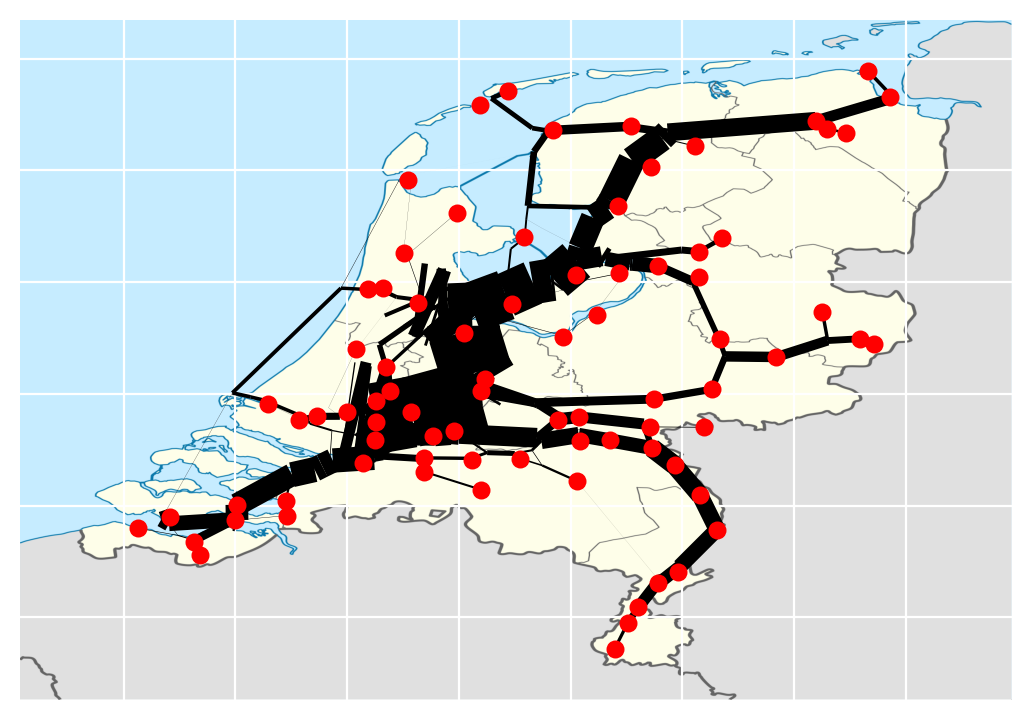

In [14]:
widths1 = plot_context(G, flows, 'passing_flow', 50000)

In [15]:
round((sum(widths1.values())-sum(widths0.values()))/sum(widths0.values())*100, 2)

9.79

In [16]:
sum(widths0.values())

56775884.83643783

In [17]:
sum(widths1.values())

62331647.1878443

In [18]:
## Why does using non-individual speeds lead to different results?

In [19]:
ship_data = pd.read_excel('data/ship_types.xlsx')

## Plot captured flow

## 60000

In [20]:
# r, p, c, x_m,  additional_nodes=0, vis=False, o=24, random_data=False, load=1, seed=None

CFRLM:
MAXIMIZE
2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431006*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',_'8863709')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',_'8867258')) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8866512',_'8864153')) + 15624.956869527025*Flow_captured_(('NLAMS',_'NLAER',_0),_('8866429',_'8864005')) + 2227.395968233117*Flow_captured_(('NLAMS',_'NLDHR',_0),_('8866429',_'8861625',_'8861568')) + 832.5368028995592*Flow_captured_(('NLAMS',_'NLIJM',_0),_('8862497',)) + 832.5368028995592*Flow_captured_(('NLAMS',_'NLIJM',_0),_('8866429',)) + 991.9932938966092*Flow_captured_(('NLBNB',_'NLHGL',_0),_('8866512',_'8864153')) + 494.8630379993027*Flow_captured_(('NLBON',_'NLSTI',_0),_('22638156',)) + 494.8630379993027*Flow_captured_(('NLBON',_'NLSTI',_0),_('8868208',)) + 3072.746109244969*Flow_captured_(('NLBZM',

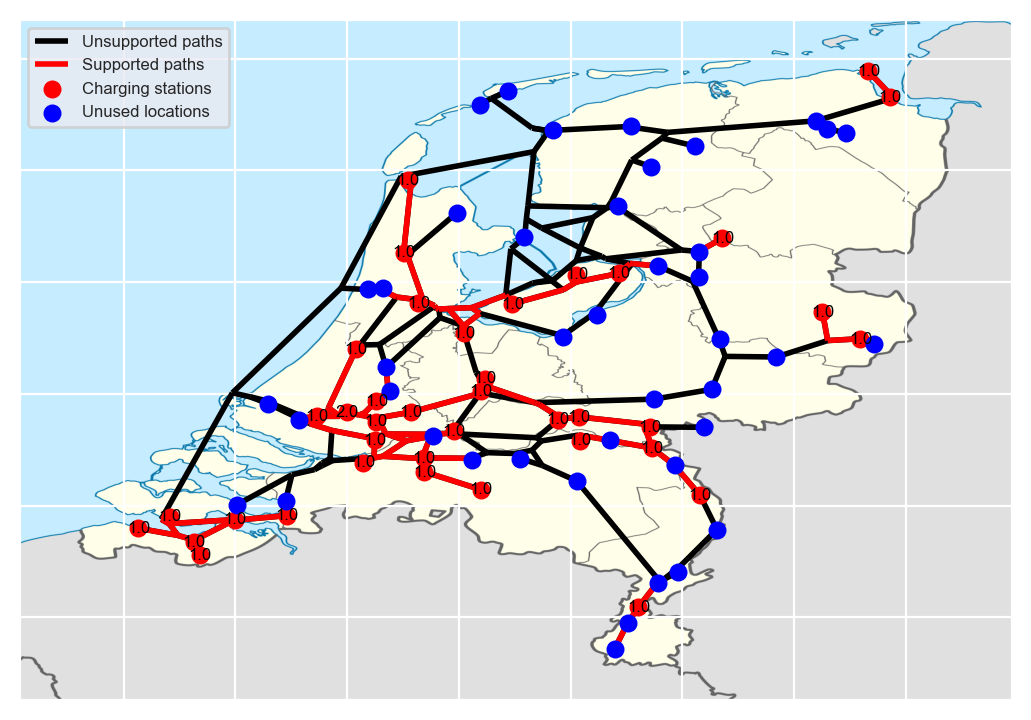

In [21]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities1, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(60000, 40, 1000, 2, vis=True)

In [22]:
print("Fraction captured total:", round(fraction_captured_total,2))
print("Fraction serviceable:", round(serviceable_fraction,2))
print("Serviced fraction:", round(served_fraction,2))
print("Expected occupation:", round(max_flow / (40 * 1000),2))

Fraction captured total: 0.09
Fraction serviceable: 0.09
Serviced fraction: 0.99
Expected occupation: 6.62


In [23]:
sum(optimal_facilities1.values())

40.0

In [24]:
captured_flows = {i:sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}

In [25]:
captured_flows = {i:j*flows[i] for i,j in captured_flows.items()}

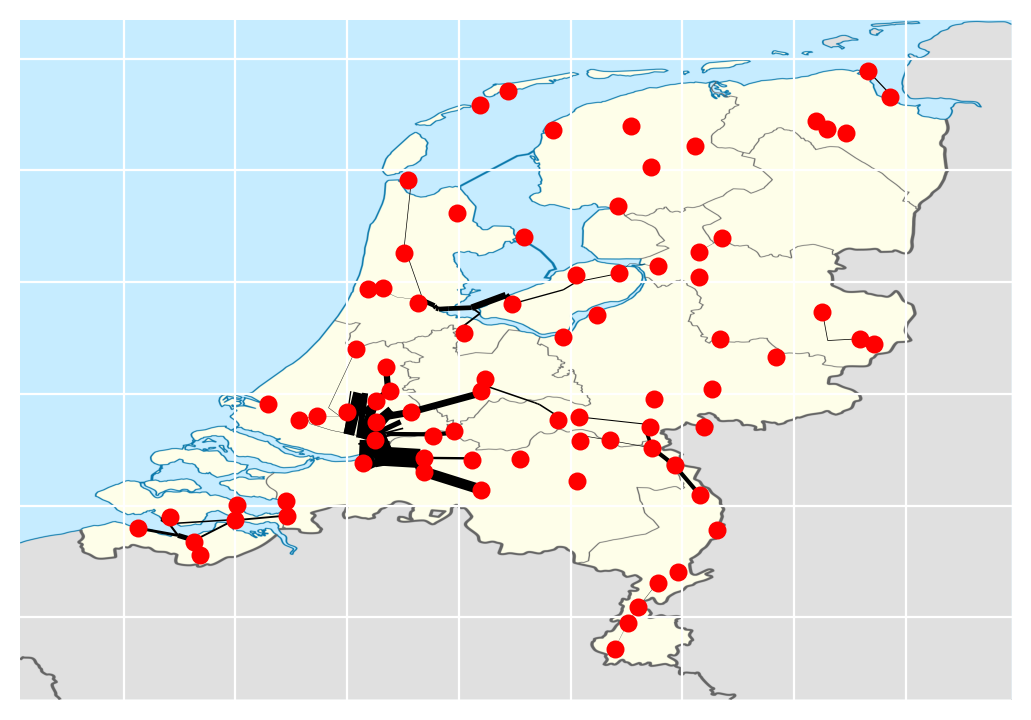

In [26]:
widths3 = plot_context(G, captured_flows, 'captured_flow_60000', 10000)

In [27]:
widths3

{('8864153', '8860579'): 2661.5084469626313,
 ('8864153', '8868168'): 0.0,
 ('8868065', '8862419'): 0.0,
 ('8868065', '8866297'): 4277.3282170138955,
 ('8868065', '8863614'): 4277.3282170138955,
 ('8865920', '8864117'): 0.0,
 ('8864526', '8864005'): 4776.393402297339,
 ('8864526', '8862690'): 4776.393402297339,
 ('8864526', '8868457'): 0.0,
 ('8868208', '8861292'): 1288.033433744094,
 ('8868208', '8867148'): 1279.5912026453852,
 ('8860933', '8864167'): 0.0,
 ('8860933', '8863336'): 0.0,
 ('8860933', '8867031'): 0.0,
 ('8863354', '22638327'): 16983.621327869187,
 ('8863354', '8861687'): 16983.621327869187,
 ('8863354', '8862687'): 0.0,
 ('8863114', '22638019'): 14933.308272713055,
 ('8863114', '8864553'): 14933.308272713055,
 ('8863114', '8860623'): 0.0,
 ('8861840', '8863288'): 0.0,
 ('8861840', '8865143'): 0.0,
 ('8861840', '8863762'): 0.0,
 ('11309058', '11309119'): 0.0,
 ('11309058', '8865990'): 0.0,
 ('11309058', '8866775'): 0.0,
 ('8867046', '8862592'): 0.0,
 ('8867046', '8863360'

## 90000

CFRLM:
MAXIMIZE
2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 2026.4622197119347*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',_'8867258')) + 2958.486641160946*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',_'8862497')) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8864153',)) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8866512',)) + 15624.956869527026*Flow_captured_(('NLAMS',_'NLAER',_0),_('8866429',_'8864005')) + 21.60326583221266*Flow_captured_(('NLAMS',_'NLBOT',_1),_('8863206',_'8866429',_'8866564')) + 21.60326583221266*Flow_captured_(('NLAMS',_'NLBOT',_1),_('8863475',_'8866429',_'8866564')) + 67.67696184470229*Flow_captured_(('NLAMS',_'NLBOT',_2),_('8863360',_'8866429',_'8863206')) + 67.67696184470229*Flow_ca

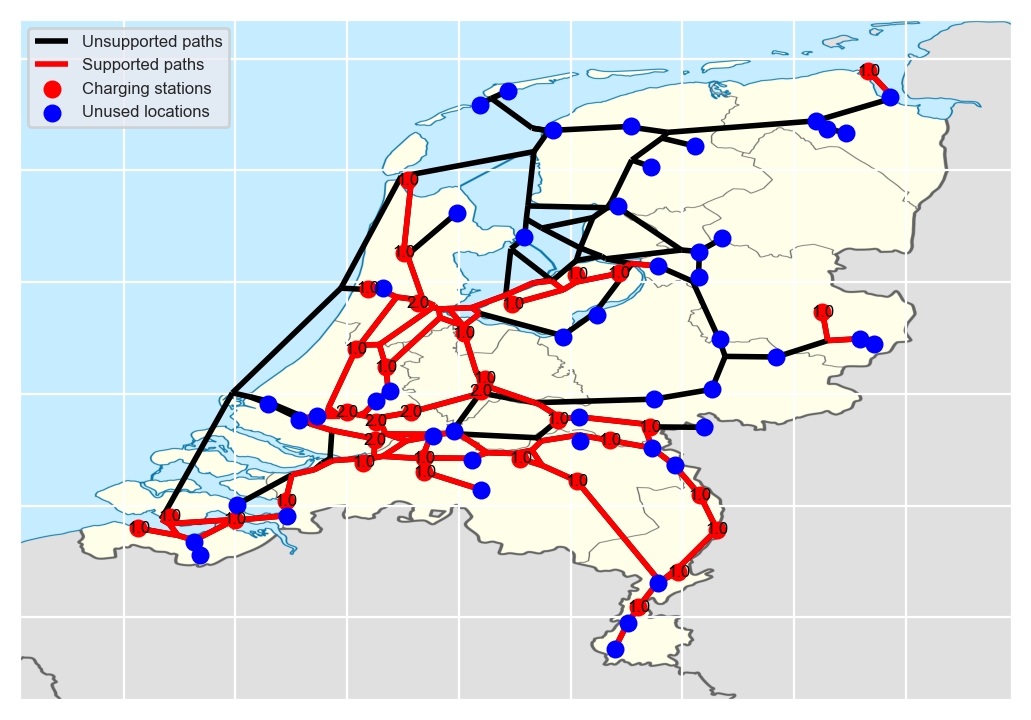

In [28]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities2, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(90000, 40, 1000, 2, vis=True)

In [29]:
print("Fraction captured total:", round(fraction_captured_total,2))
print("Fraction serviceable:", round(serviceable_fraction,2))
print("Serviced fraction:", round(served_fraction,2))
print("Expected occupation:", round(max_flow / (40 * 1000),2))

Fraction captured total: 0.17
Fraction serviceable: 0.24
Serviced fraction: 0.71
Expected occupation: 12.56


In [30]:
sum(optimal_facilities2.values())

40.0

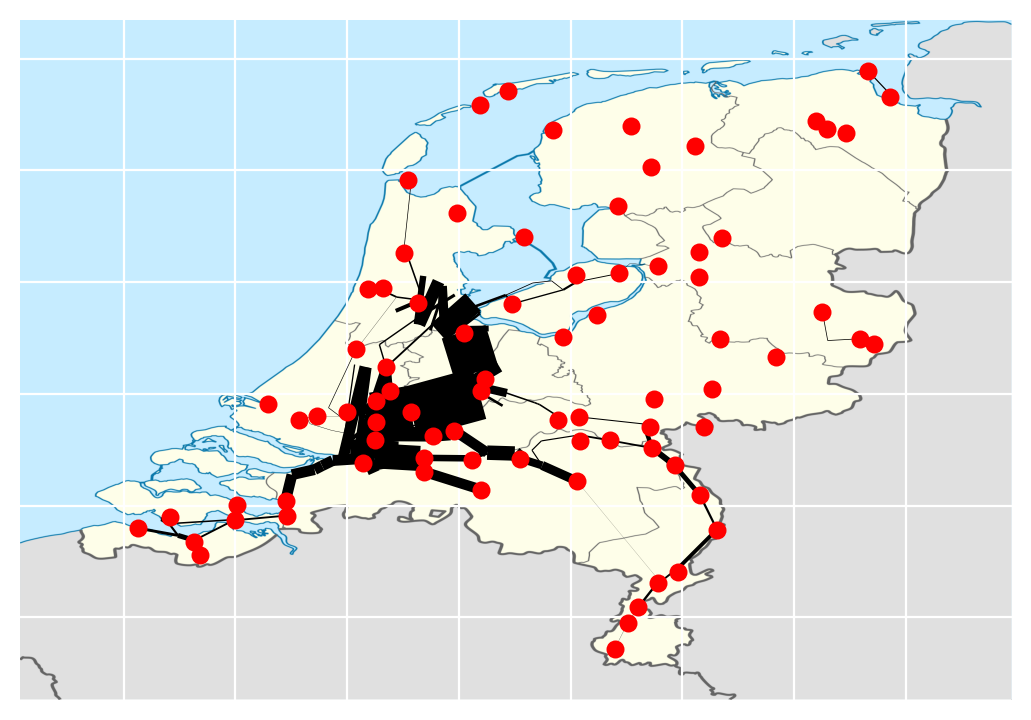

In [31]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths4 = plot_context(G, captured_flows, 'captured_flow_90000', 10000)

## 120000

CFRLM:
MAXIMIZE
2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704283*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431006*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431006*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 11277.026528683966*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8863360')) + 11277.026528683966*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8867538')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863360')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8867538')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',)) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8867258',)) + 2958.486641160946*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',_'8862497')) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('8864153',)) + 1421.2166782652046*Flow_captured_(('NLALM',_'NLHGL',_0),_('

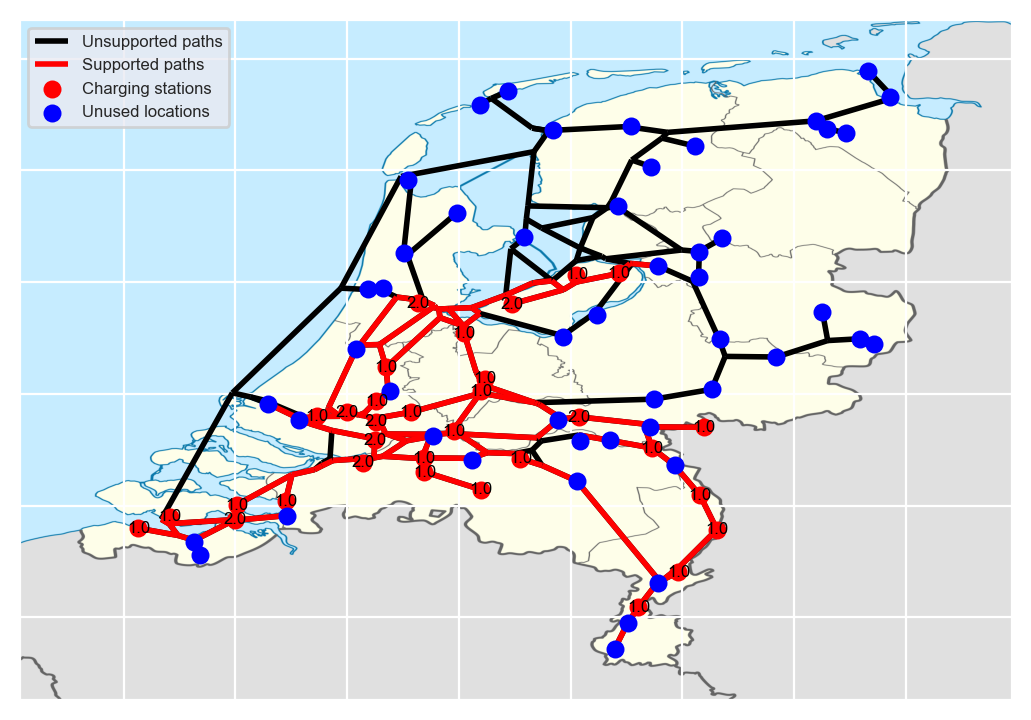

In [32]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities3, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(120000, 40, 1000, 2, vis=True)

In [33]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Expected occupation:", round(max_flow / (40 * 1000), 2))

Fraction captured total: 0.24
Fraction serviceable: 0.53
Fraction serviced: 0.46
Expected occupation: 17.8


In [34]:
sum(optimal_facilities3.values())

40.0

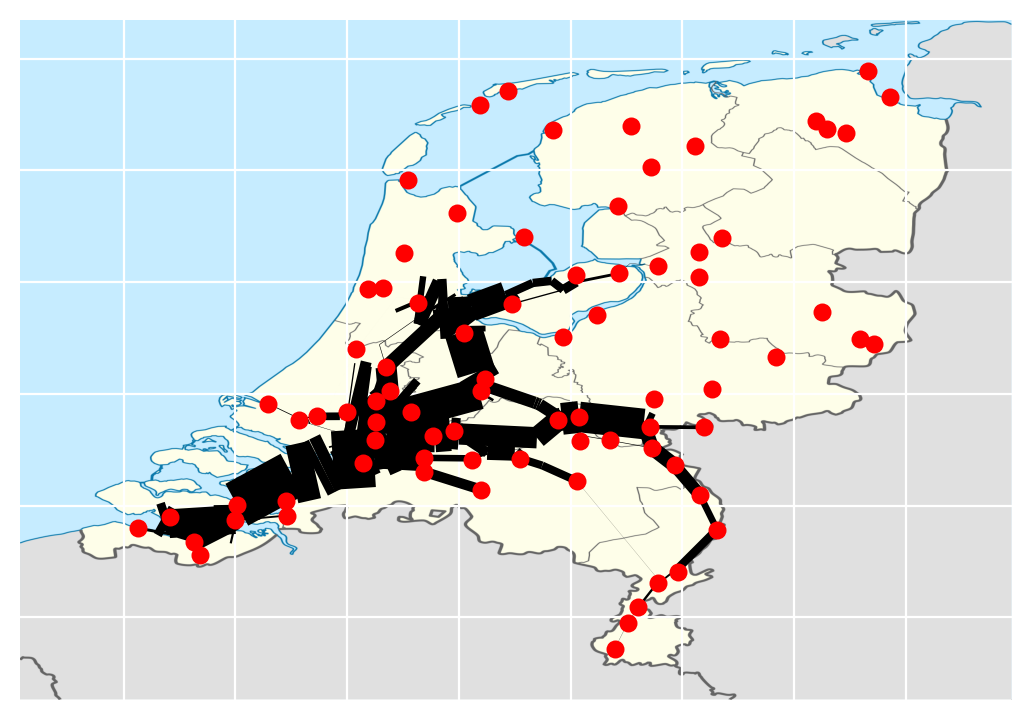

In [35]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths5 = plot_context(G, captured_flows, 'captured_flow_120000', 10000)

## 150000

CFRLM:
MAXIMIZE
2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 2703.5759068704288*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8863709',)) + 2212.1197716431*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',)) + 11277.026528683968*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8863360')) + 11277.026528683968*Flow_captured_(('NLAER',_'NLNIE',_0),_('8864005',_'8867538')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863306')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8863360')) + 29584.428391712176*Flow_captured_(('NLAER',_'NLRTM',_0),_('8864005',_'8867538')) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8864005',)) + 2026.4622197119354*Flow_captured_(('NLAER',_'NLSWI',_0),_('8867258',)) + 2958.4866411609455*Flow_captured_(('NLALK',_'NLIJM',_0),_('8861625',)) + 2958.4866411609455*Flow_captured_(('NLALK',_'NLIJM',_0),_('88624

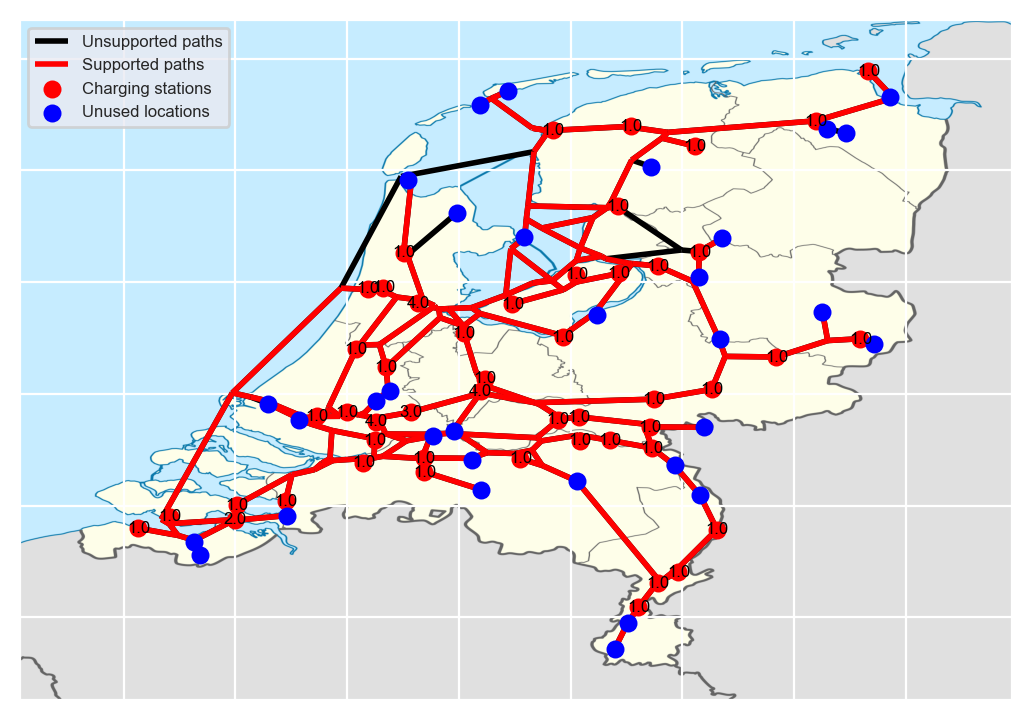

In [78]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities4, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(150000, 100, 2500, 4, vis=True, additional_nodes=0)

In [79]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Expected occupation:", round(max_flow / (100 * 1000), 2))

Fraction captured total: 0.72
Fraction serviceable: 0.75
Fraction serviced: 0.96
Expected occupation: 21.07


In [67]:
# Fraction captured total: 0.57
# Fraction serviceable: 0.75
# Fraction serviced: 0.76
# Expected occupation: 16.75

In [68]:
sum(optimal_facilities4.values())

131.0

plotting does not work with extra nodes yet now...

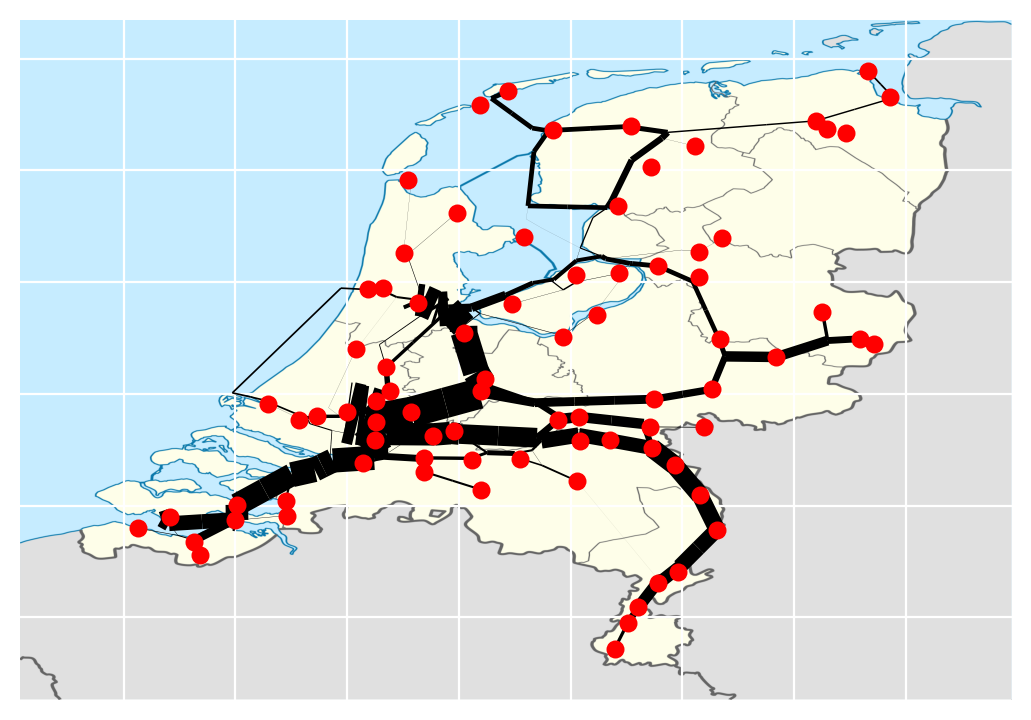

In [75]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths6 = plot_context(G, captured_flows, 'captured_flow_150000', 50000)

## Compare outcomes in detail

In [40]:
df = pd.DataFrame([optimal_facilities1,optimal_facilities2,optimal_facilities3,optimal_facilities4])

In [41]:
df = df.T

In [42]:
df=df.rename(columns={0:'60km', 1:'90km', 2:'120km', 3:'150km'})

In [43]:
df.loc[df['60km']!=0].sum()

60km     40.0
90km     32.0
120km    33.0
150km    83.0
dtype: float64

In [44]:
df.loc[df['90km']!=0].sum()

60km     27.0
90km     40.0
120km    31.0
150km    81.0
dtype: float64

In [45]:
df.loc[df['120km']!=0].sum()

60km     26.0
90km     30.0
120km    40.0
150km    82.0
dtype: float64

In [46]:
df.loc[df['150km']!=0].sum()

60km      32.0
90km      35.0
120km     38.0
150km    100.0
dtype: float64

In [47]:
df_always = df.loc[(df>0).all(axis=1)]
df_always

,60km,90km,120km,150km
22638019,1.0,1.0,1.0,1.0
30984595,1.0,1.0,2.0,3.0
8861528,1.0,1.0,1.0,1.0
8863306,2.0,2.0,2.0,4.0
8863709,1.0,1.0,1.0,1.0
8863818,1.0,1.0,1.0,1.0
8864005,1.0,1.0,2.0,3.0
8864020,1.0,1.0,1.0,1.0
8864111,1.0,1.0,1.0,2.0
8866429,1.0,2.0,2.0,4.0


### Density plots

In [48]:
# we want to scale all the points with the total number of stations
scale_factor=0.2
node_scales = dict(df.sum(axis=1))
scaled_widths = {i:(node_scales[i]/scale_factor) for i in node_scales.keys()}


NetworkXError: Node '103' has no position.

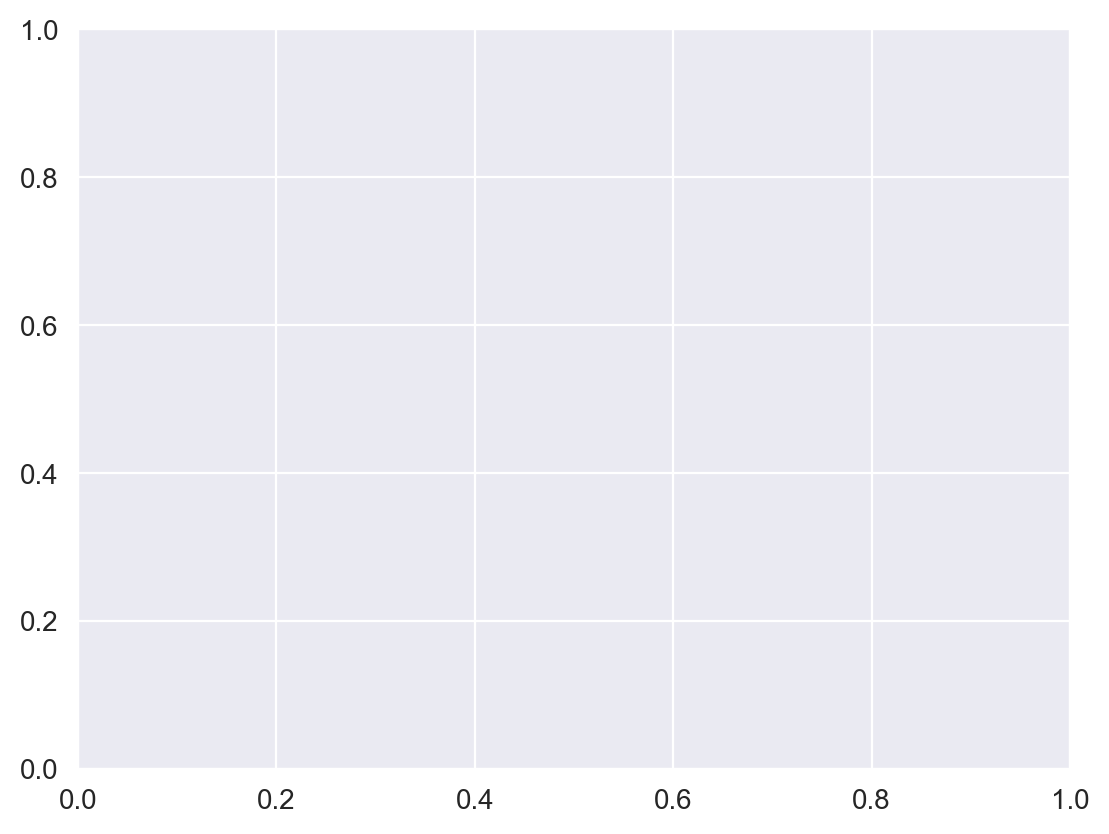

In [49]:
plt.subplots(dpi=200)
nx.draw_networkx_nodes(G,pos_dict,
                       nodelist=scaled_widths.keys(),
                       node_size=list(scaled_widths.values()),
                       node_color='r',
                       alpha=1)

nx.draw_networkx_edges(G,pos_dict)

In [ ]:
df_always.index

In [ ]:
plt.subplots(dpi=200)
nx.draw_networkx_nodes(G,pos_dict,
                       nodelist=list(df_always.index),
                       node_size=30,
                       node_color='r',
                       alpha=1)

nx.draw_networkx_edges(G,pos_dict)

## Extreme values

### Max range 1,000,000, 40 modules

In [ ]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(1000000, 40, 1000, 2, vis=True)

In [ ]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Expected occupation:", round(max_flow / (40 * 1000), 2))

In [ ]:
sum(optimal_facilities.values())

In [ ]:
routes_supported

In [ ]:
for route, combi_flow in non_zero_flows.items():
    print(sum(combi_flow['flows']))

In [ ]:
max_flow

In [ ]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths7 = plot_context(G, captured_flows, 'captured_flow_1mln', 10000)

In [ ]:
flow_cols = [col for col in df_links.columns if 'flow' in col]

In [ ]:
flow_cols

In [ ]:
df_links[flow_cols].sum()

### Single station with unlimited capacity and range

In [ ]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(1000000, 1, 10e12, 2, vis=True)

In [ ]:
captured_flows = {i: sum(non_zero_flows[i]['flows']) for i in non_zero_flows.keys()}
captured_flows = {i: j * flows[i] for i, j in captured_flows.items()}
widths7 = plot_context(G, captured_flows, 'captured_flow_1mln_single', 10000)

In [ ]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))
print("Charging:", round(max_flow / (1 * 10e12), 2))

In [ ]:
non_zero_flows

### Single station, limited capacity, range of 60000, 90000, 120000, and 150000

In [ ]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(60000, 1, 10e12, 2, vis=True)

In [ ]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))

In [ ]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(90000, 1, 10e12, 2, vis=True)

In [ ]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))

In [ ]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(120000, 1, 10e12, 2, vis=True)

In [ ]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))

In [ ]:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_flow = flow_refueling_location_model(150000, 1, 10e12, 2, vis=True)

In [ ]:
print("Fraction captured total:", round(fraction_captured_total, 2))
print("Fraction serviceable:", round(serviceable_fraction, 2))
print("Fraction serviced:", round(served_fraction, 2))